# Project 1 - Regression for Numeric Data

#### Group Member: Shichao Zhou, Jinming Chen, Maojudan Nihemaiti

## 1. Introduction

In this project, we analyze a dataset comprised of information pertaining to NY State High School graduation metrics for the 2018-2019 school year to construct two multiple regression models, two different Poisson regression models, two different negative binomial regression models, and select the preferred model. 

Here are the steps: 

Firstly, we use exploratory data analysis to have a better understanding of each attribute and prepare and clean the data for building models. 

Secondly, we use feature selection methods such as the Step forward method and the Univariate Selection Method to select the attributes to build our model that "dropout_cnt" is the response variable. 

Thirdly, we re-run our EDA to check if the variables are ready to be used in our model building. 

Fourthly, we split the data into dedicated training and testing subsets, and build two different Poisson regression models, two different negative binomial regression models, and two multiple linear regression models. 

Last but not least, we select our preferred model by comparing their Log-Likelihood value. 

## 2. Exploratory Data Analysis

#### Data Description

- report_school_year: Indicates school year for which high school graduation info is being reported
- aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
- aggregation_type: Text description of how high school graduation data has been aggregated
- nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
- nrc_desc: Text description of the type of school district
- county_code: Numeric code for county name
- county_name: Full name of applicable NY State county
- nyc_ind: Indicates whether or not the school district resides within the borders of NYC
- membership_desc: Indicates school year in which students first enrolled in High School
- subgroup_code: Numeric code identifying student subgrouping
- subgroup_name: Text description of student subgrouping
- enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
- grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
- grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
- local_cnt:  How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
- local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
- reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non diploma credential
- non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
- still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
- ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
- dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
- dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year



In [1]:
# Load all the libraries that are needed
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import ndarray as nd
from sklearn.impute import SimpleImputer

In [2]:
# Start by reading a set of sample data from github

df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/Project1_Data.csv")

df.head(3)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%


In [3]:
# Pre-review the dataframe
df.shape

(73152, 29)

In [4]:
# Check column subgroup_name
df2 = df.subgroup_name.value_counts()
print(df2)

Not Homeless                         4074
All Students                         4074
Parent Not in Armed Forces           4074
Not Migrant                          4074
Not in Foster Care                   4070
Male                                 4068
Not English Language Learner         4068
Female                               4060
General Education Students           4056
White                                4050
Economically Disadvantaged           4046
Students with Disabilities           4028
Not Economically Disadvantaged       4028
Hispanic                             3352
Black                                3066
Asian/Pacific Islander               2752
Homeless                             2702
Multiracial                          2690
English Language Learner             1824
Formerly English Language Learner    1464
American Indian/Alaska Native        1312
In Foster Care                        616
Migrant                               362
Parent in Armed Forces            

Because 'All Students' represents the most student group, so we will use 'All Students' as our student group. 

In [5]:
# Choose the subset from dataset for further analysis
df1=df[df['subgroup_name']=='All Students']
df1

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome,...,101,15%,14,2%,43,6%,7,1%,140,21%
44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome,...,113,16%,7,1%,123,17%,7,1%,115,16%
66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,101,15%,14,2%,35,5%,7,1%,140,21%
88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,113,16%,7,1%,99,14%,7,1%,115,16%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome,...,7,14%,2,4%,1,2%,0,0%,4,8%
73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome,...,4,7%,2,3%,5,8%,0,0%,4,7%
73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,7,14%,2,4%,0,0%,0,0%,4,8%
73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,4,7%,2,3%,5,8%,0,0%,4,7%


In [6]:
# Pre-review the new dataframe
df1.shape

(4074, 29)

Before we start our analysis, we have to clean our dataframe, include:
data type, 
missing values and outliners.

In [7]:
# Basic statisical insight
df1.describe() 

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,4074.0,4074.000000,4074.000000,4074.000000,4074.0
mean,3.0,4.615611,35.905253,0.047128,1.0
std,0.0,1.144168,20.828137,0.211939,0.0
min,3.0,1.000000,1.000000,0.000000,1.0
25%,3.0,4.000000,16.000000,0.000000,1.0
50%,3.0,5.000000,40.000000,0.000000,1.0
75%,3.0,5.000000,57.000000,0.000000,1.0
max,3.0,6.000000,68.000000,1.000000,1.0


In [8]:
# Check the data type
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 73136
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          4074 non-null   object
 1   aggregation_index           4074 non-null   int64 
 2   aggregation_type            4074 non-null   object
 3   aggregation_name            4074 non-null   object
 4   nrc_code                    4074 non-null   int64 
 5   nrc_desc                    4074 non-null   object
 6   county_code                 4074 non-null   int64 
 7   county_name                 4074 non-null   object
 8   nyc_ind                     4074 non-null   int64 
 9   membership_desc             4074 non-null   object
 10  subgroup_code               4074 non-null   int64 
 11  subgroup_name               4074 non-null   object
 12  enroll_cnt                  4074 non-null   object
 13  grad_cnt                    4074 non-null   obj

In [9]:
# Check the missing values
df1.isnull().sum() 

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [10]:
# Pre-review the dataframe
df1[(df1['enroll_cnt'] == '-')]

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
4594,2018-19,3,District,RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT,5,Average Needs,4,CATTARAUGUS,0,2014 Total Cohort - 5 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4604,2018-19,3,District,RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT,5,Average Needs,4,CATTARAUGUS,0,2015 Total Cohort - 4 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4614,2018-19,3,District,RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT,5,Average Needs,4,CATTARAUGUS,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
4624,2018-19,3,District,RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT,5,Average Needs,4,CATTARAUGUS,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
9272,2018-19,3,District,BERKSHIRE UNION FREE SCHOOL DISTRICT,5,Average Needs,10,COLUMBIA,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
9282,2018-19,3,District,BERKSHIRE UNION FREE SCHOOL DISTRICT,5,Average Needs,10,COLUMBIA,0,2014 Total Cohort - 5 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
9307,2018-19,3,District,BERKSHIRE UNION FREE SCHOOL DISTRICT,5,Average Needs,10,COLUMBIA,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
9332,2018-19,3,District,BERKSHIRE UNION FREE SCHOOL DISTRICT,5,Average Needs,10,COLUMBIA,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
19856,2018-19,3,District,LONG LAKE CENTRAL SCHOOL DISTRICT,6,Low Needs,20,HAMILTON,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
19879,2018-19,3,District,LONG LAKE CENTRAL SCHOOL DISTRICT,6,Low Needs,20,HAMILTON,0,2015 Total Cohort - 4 Year Outcome,...,-,-,-,-,-,-,-,-,-,-


According to the result, we can find the missing values '-'. We need to fix the missing vaules for further analysis.
Therefore, we plan to drop the missing vaues.

##### Missing Vaules

In [11]:
# Drop the '-' values
df_dro = df1.copy()

In [12]:
# Drop the missing values
df_drop=df_dro[~df_dro['enroll_cnt'].isin(['-'])] 

df_drop

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome,...,101,15%,14,2%,43,6%,7,1%,140,21%
44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome,...,113,16%,7,1%,123,17%,7,1%,115,16%
66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,101,15%,14,2%,35,5%,7,1%,140,21%
88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,113,16%,7,1%,99,14%,7,1%,115,16%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome,...,7,14%,2,4%,1,2%,0,0%,4,8%
73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome,...,4,7%,2,3%,5,8%,0,0%,4,7%
73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2014 Total Cohort - 5 Year Outcome - August 2019,...,7,14%,2,4%,0,0%,0,0%,4,8%
73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2015 Total Cohort - 4 Year Outcome - August 2019,...,4,7%,2,3%,5,8%,0,0%,4,7%


In [13]:
# Reset the index
df_drop = df_drop.reset_index()
df_drop

,index,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101,15%,14,2%,43,6%,7,1%,140,21%
2,44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113,16%,7,1%,123,17%,7,1%,115,16%
3,66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101,15%,14,2%,35,5%,7,1%,140,21%
4,88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113,16%,7,1%,99,14%,7,1%,115,16%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7,14%,2,4%,1,2%,0,0%,4,8%
4042,73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4,7%,2,3%,5,8%,0,0%,4,7%
4043,73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7,14%,2,4%,0,0%,0,0%,4,8%
4044,73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4,7%,2,3%,5,8%,0,0%,4,7%


In [14]:
# Check the data type
df_drop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       4046 non-null   int64 
 1   report_school_year          4046 non-null   object
 2   aggregation_index           4046 non-null   int64 
 3   aggregation_type            4046 non-null   object
 4   aggregation_name            4046 non-null   object
 5   nrc_code                    4046 non-null   int64 
 6   nrc_desc                    4046 non-null   object
 7   county_code                 4046 non-null   int64 
 8   county_name                 4046 non-null   object
 9   nyc_ind                     4046 non-null   int64 
 10  membership_desc             4046 non-null   object
 11  subgroup_code               4046 non-null   int64 
 12  subgroup_name               4046 non-null   object
 13  enroll_cnt                  4046 non-null   obje

#### Modify data type

Due to the problem of the data type in some columns, we need to adjust the data type.

In [15]:
# Convert percentage into numeric
df_drop['grad_pct'] = df_drop['grad_pct'].str.strip('%').astype(float)/100 
df_drop['local_pct'] = df_drop['local_pct'].str.strip('%').astype(float)/100 
df_drop['reg_pct'] = df_drop['reg_pct'].str.strip('%').astype(float)/100 
df_drop['reg_adv_pct'] = df_drop['reg_adv_pct'].str.strip('%').astype(float)/100 
df_drop['non_diploma_credential_pct'] = df_drop['non_diploma_credential_pct'].str.strip('%').astype(float)/100 
df_drop['still_enr_cnt'] = df_drop['still_enr_cnt'].str.strip('%').astype(float)/100
df_drop['ged_pct'] = df_drop['ged_pct'].str.strip('%').astype(float)/100
df_drop['dropout_pct'] = df_drop['dropout_pct'].str.strip('%').astype(float)/100
df_drop['still_enr_pct'] = df_drop['still_enr_pct'].str.strip('%').astype(float)/100
df_drop

,index,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,91,0.14,16,0.02,0.30,0.05,0,0.00,148,0.22
1,22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101,0.15,14,0.02,0.43,0.06,7,0.01,140,0.21
2,44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113,0.16,7,0.01,1.23,0.17,7,0.01,115,0.16
3,66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101,0.15,14,0.02,0.35,0.05,7,0.01,140,0.21
4,88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113,0.16,7,0.01,0.99,0.14,7,0.01,115,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7,0.14,2,0.04,0.01,0.02,0,0.00,4,0.08
4042,73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4,0.07,2,0.03,0.05,0.08,0,0.00,4,0.07
4043,73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7,0.14,2,0.04,0.00,0.00,0,0.00,4,0.08
4044,73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4,0.07,2,0.03,0.05,0.08,0,0.00,4,0.07


In [16]:
# Covert string into numeric
df_drop["enroll_cnt"] = df_drop["enroll_cnt"].astype("float64")
df_drop["grad_cnt"] = df_drop["grad_cnt"].astype("float64")
df_drop["local_cnt"] = df_drop["local_cnt"].astype("float64")
df_drop["reg_cnt"] = df_drop["reg_cnt"].astype("float64")
df_drop["reg_adv_cnt"] = df_drop["reg_adv_cnt"].astype("float64")
df_drop["non_diploma_credential_cnt"] = df_drop["non_diploma_credential_cnt"].astype("float64")
df_drop["ged_cnt"] = df_drop["ged_cnt"].astype("float64")
df_drop["dropout_cnt"] = df_drop["dropout_cnt"].astype("int64")
df_drop

,index,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,91.0,0.14,16.0,0.02,0.30,0.05,0.0,0.00,148,0.22
1,22,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101.0,0.15,14.0,0.02,0.43,0.06,7.0,0.01,140,0.21
2,44,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113.0,0.16,7.0,0.01,1.23,0.17,7.0,0.01,115,0.16
3,66,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,101.0,0.15,14.0,0.02,0.35,0.05,7.0,0.01,140,0.21
4,88,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,113.0,0.16,7.0,0.01,0.99,0.14,7.0,0.01,115,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,73074,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7.0,0.14,2.0,0.04,0.01,0.02,0.0,0.00,4,0.08
4042,73090,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4.0,0.07,2.0,0.03,0.05,0.08,0.0,0.00,4,0.07
4043,73105,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,7.0,0.14,2.0,0.04,0.00,0.00,0.0,0.00,4,0.08
4044,73121,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,4.0,0.07,2.0,0.03,0.05,0.08,0.0,0.00,4,0.07


In [17]:
# Check the data type
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       4046 non-null   int64  
 1   report_school_year          4046 non-null   object 
 2   aggregation_index           4046 non-null   int64  
 3   aggregation_type            4046 non-null   object 
 4   aggregation_name            4046 non-null   object 
 5   nrc_code                    4046 non-null   int64  
 6   nrc_desc                    4046 non-null   object 
 7   county_code                 4046 non-null   int64  
 8   county_name                 4046 non-null   object 
 9   nyc_ind                     4046 non-null   int64  
 10  membership_desc             4046 non-null   object 
 11  subgroup_code               4046 non-null   int64  
 12  subgroup_name               4046 non-null   object 
 13  enroll_cnt                  4046 

In [18]:
# Pre-review the dataframe
df_drop.shape

(4046, 30)

In [19]:
# Prepare numeric data for the further annalysis
df_drop_num=df_drop[['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']]

#### Outliers

In [20]:
# Define a function 
def outlier(data,col):
# Use IQR statistical method to detect outliers of numerical variables 
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    data = (data[col] < (q1 - 1.5 * IQR)) | (data[col] > (q3 + 1.5 * IQR))
    return data
# Calling function outlier
data_outlier = pd.DataFrame(df_drop_num)
# Printing Results
print('Columns with outliers: {}'.format(len(data_outlier.columns)))
# Output
print(data_outlier.columns)

Columns with outliers: 17
Index(['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct',
       'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')


There are seventeen columns have outliers.

#### Data visualization

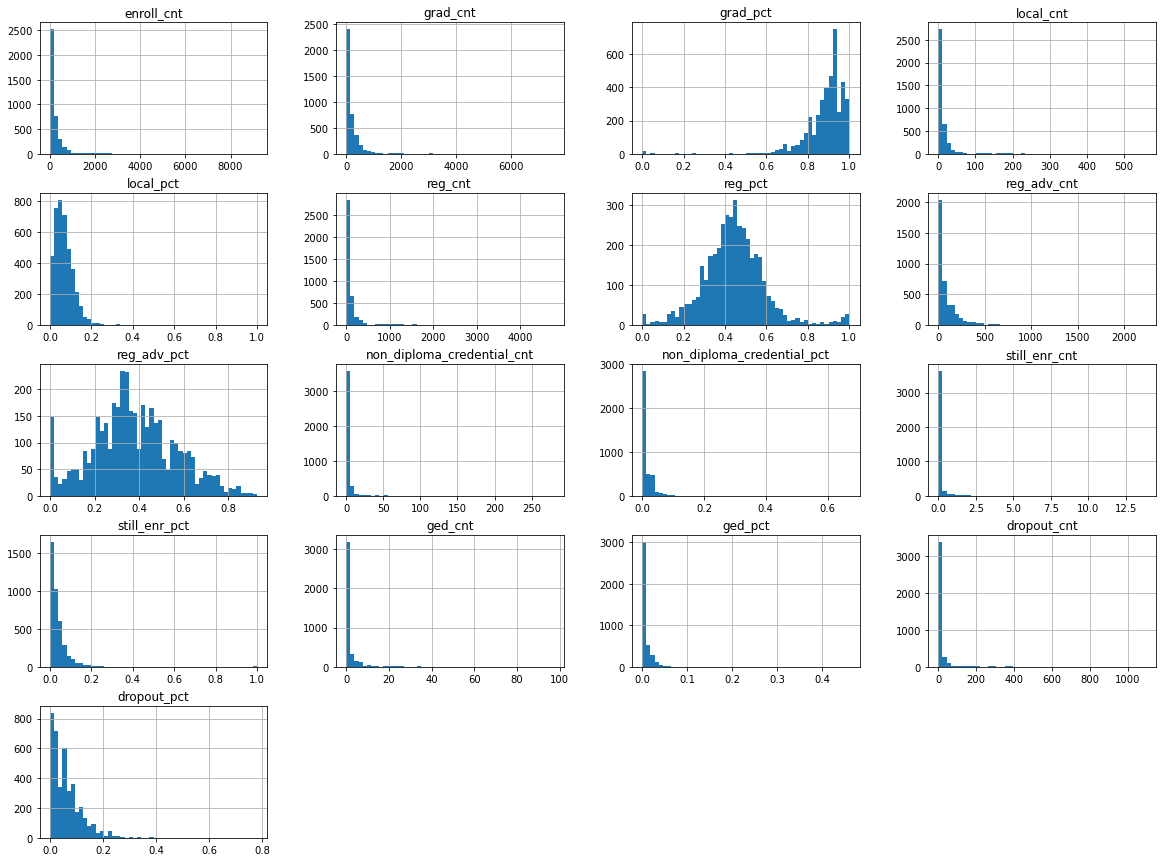

In [21]:
# Check the distribution for each column
df_drop_num.columns = df_drop_num.columns
df_drop_num.hist(bins=50, figsize=(20,15))
plt.show()

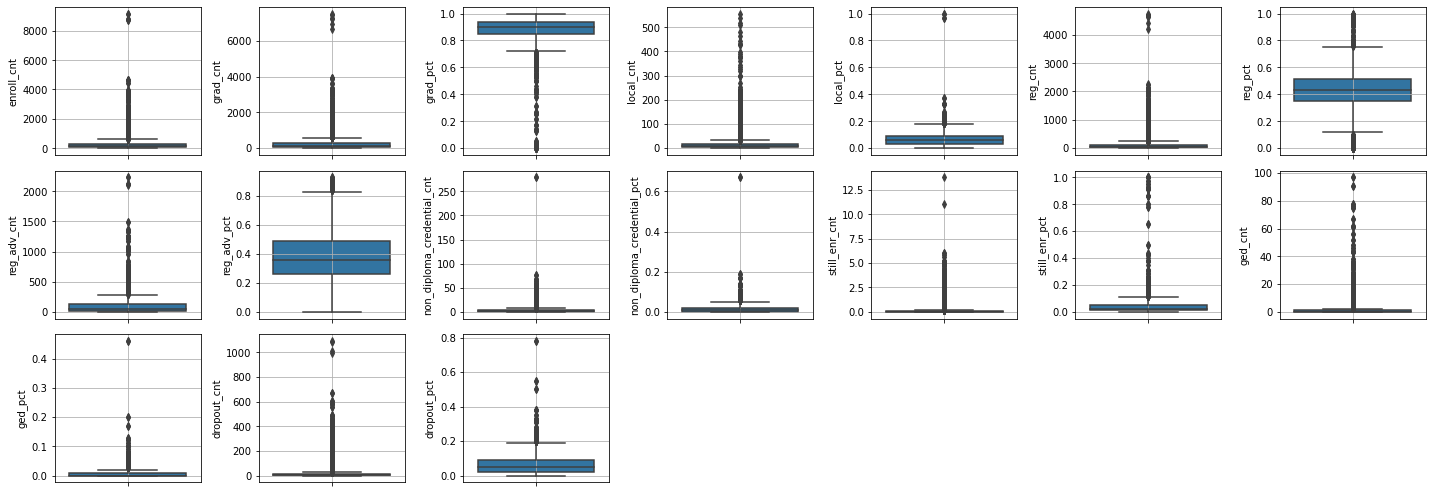

In [22]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(df_drop_num):
    plt.subplot(7,7, i + 1)
    sns.boxplot(data=df_drop_num,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

Based on the histogram and box plots, most of the attributes have many outliers and do not follow a normal distribution. Only "reg_adv_pct" and "reg_pct" follow nearly normal distribution. 

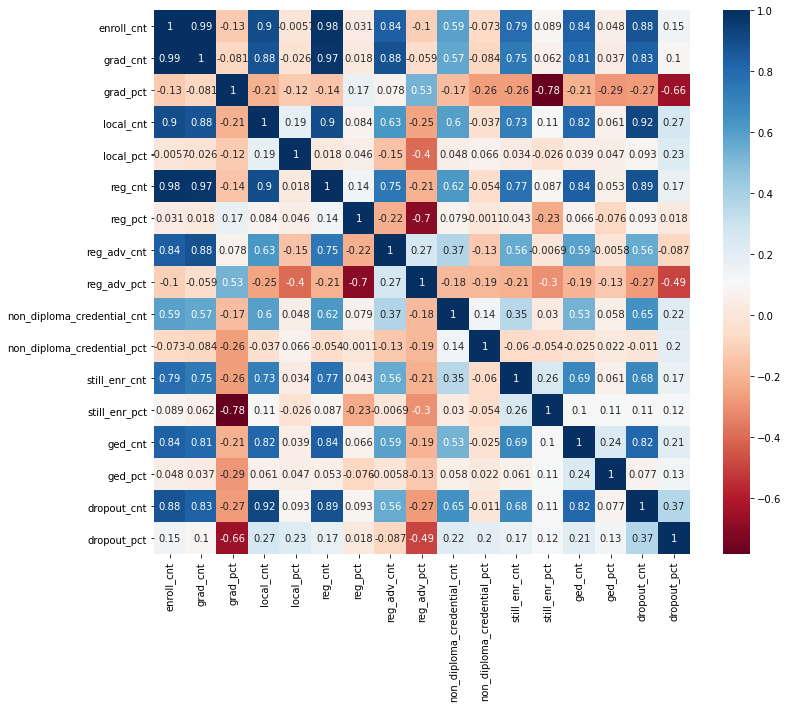

In [23]:
# Use the heatmap to visualize the correlation between each feature (可能需要删掉)

# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))

corr = df_drop_num.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Show the heatmap
plt.show()


Based on the heatmap, enroll_cnt, grad_cnt,local_cnt, reg_cnt, and ged_cnt have pretty strong relationship with the response variable "drop_cnt". And the heatmap helps our feature selection and build models.

## 3. Data Preparation

####  Attribute Transformation

In [24]:
# Explotory variables
df = df_drop_num.copy()
data_ex =df.drop(labels=['dropout_cnt'], axis=1)
data_ex

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct
0,658.0,464.0,0.71,63.0,0.10,310.0,0.47,91.0,0.14,16.0,0.02,0.30,0.05,0.0,0.00,0.22
1,678.0,474.0,0.70,64.0,0.09,309.0,0.46,101.0,0.15,14.0,0.02,0.43,0.06,7.0,0.01,0.21
2,704.0,452.0,0.64,44.0,0.06,295.0,0.42,113.0,0.16,7.0,0.01,1.23,0.17,7.0,0.01,0.16
3,678.0,482.0,0.71,65.0,0.10,316.0,0.47,101.0,0.15,14.0,0.02,0.35,0.05,7.0,0.01,0.21
4,704.0,476.0,0.68,50.0,0.07,313.0,0.44,113.0,0.16,7.0,0.01,0.99,0.14,7.0,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,49.0,42.0,0.86,8.0,0.16,27.0,0.55,7.0,0.14,2.0,0.04,0.01,0.02,0.0,0.00,0.08
4042,59.0,48.0,0.81,8.0,0.14,36.0,0.61,4.0,0.07,2.0,0.03,0.05,0.08,0.0,0.00,0.07
4043,49.0,43.0,0.88,9.0,0.18,27.0,0.55,7.0,0.14,2.0,0.04,0.00,0.00,0.0,0.00,0.08
4044,59.0,48.0,0.81,8.0,0.14,36.0,0.61,4.0,0.07,2.0,0.03,0.05,0.08,0.0,0.00,0.07


In [25]:
# Response variable
data_res =df_drop_num['dropout_cnt']

data_res.columns=['dropout_cnt']
data_res

0       148
1       140
2       115
3       140
4       115
       ... 
4041      4
4042      4
4043      4
4044      4
4045     11
Name: dropout_cnt, Length: 4046, dtype: int64

In [26]:
data = (data_ex-data_ex.min())/(data_ex.max()-data_ex.min())
data_stand = pd.DataFrame(data)

In [28]:
# Add columns
data_stand.columns = [['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct',
       'dropout_pct']]

data_stand_update = data_stand
data_stand_update

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct
0,0.071203,0.061538,0.71,0.113106,0.10,0.065236,0.47,0.040789,0.150538,0.057348,0.029851,0.021723,0.05,0.000000,0.000000,0.282051
1,0.073383,0.062865,0.70,0.114901,0.09,0.065025,0.46,0.045271,0.161290,0.050179,0.029851,0.031137,0.06,0.072165,0.021739,0.269231
2,0.076219,0.059947,0.64,0.078995,0.06,0.062079,0.42,0.050650,0.172043,0.025090,0.014925,0.089066,0.17,0.072165,0.021739,0.205128
3,0.073383,0.063926,0.71,0.116697,0.10,0.066498,0.47,0.045271,0.161290,0.050179,0.029851,0.025344,0.05,0.072165,0.021739,0.269231
4,0.076219,0.063130,0.68,0.089767,0.07,0.065867,0.44,0.050650,0.172043,0.025090,0.014925,0.071687,0.14,0.072165,0.021739,0.205128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,0.004798,0.005570,0.86,0.014363,0.16,0.005682,0.55,0.003138,0.150538,0.007168,0.059701,0.000724,0.02,0.000000,0.000000,0.102564
4042,0.005888,0.006366,0.81,0.014363,0.14,0.007576,0.61,0.001793,0.075269,0.007168,0.044776,0.003621,0.08,0.000000,0.000000,0.089744
4043,0.004798,0.005703,0.88,0.016158,0.18,0.005682,0.55,0.003138,0.150538,0.007168,0.059701,0.000000,0.00,0.000000,0.000000,0.102564
4044,0.005888,0.006366,0.81,0.014363,0.14,0.007576,0.61,0.001793,0.075269,0.007168,0.044776,0.003621,0.08,0.000000,0.000000,0.089744


#### Feature selection

In this step, we will use two differect methods to complete the feature selection, include:

- Method 1 - Step forward
- Method 2 - Univariate Selection Method

Method 1 - Step forward

In [29]:
# Pip install mlxtend
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Separate training and testing sets
# Response variable & explantory vairables 
y = data_res
x= data_stand_update

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((2832, 16), (1214, 16))

In [30]:
X_train.head(1)

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct
3258,0.049504,0.054111,0.89,0.062837,0.08,0.042508,0.44,0.076647,0.397849,0.007168,0.0,0.023896,0.07,0.0,0.0,0.038462


In [31]:
y_train.head(1)

3258    16
Name: dropout_cnt, dtype: int64

In [32]:
# Detect highly correlated features
def correlation(data,threshold):
# Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
# We care about absolute coef value
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
corr_features = correlation(X_train,0.85)
corr_features

{('grad_cnt',), ('local_cnt',), ('reg_adv_cnt',), ('reg_cnt',)}

From the above output, these features are highly correlated. In case of overfitting,we remove the first three features.

In [33]:
corr_features = {('grad_cnt',), ('local_cnt',), ('reg_adv_cnt',)}

In [34]:
# Update the dataframe based on the result from correlation function
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

C:\Users\zhous\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((2832, 13), (1214, 13))

In [35]:
np.array(X_train)

array([[0.04950387, 0.89      , 0.08      , ..., 0.        , 0.        ,
        0.03846154],
       [0.00708756, 0.83      , 0.04      , ..., 0.        , 0.        ,
        0.08974359],
       [0.04230727, 0.93      , 0.05      , ..., 0.02061856, 0.02173913,
        0.02564103],
       ...,
       [0.00806891, 0.91      , 0.06      , ..., 0.        , 0.        ,
        0.1025641 ],
       [0.00632428, 0.75      , 0.02      , ..., 0.        , 0.        ,
        0.24358974],
       [0.00130847, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
# Step forward feature selection for training data
# https://scikit-learn.org/0.24/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs = sfs.fit(np.array(X_train), np.array(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.2s finished

[2021-10-24 23:38:32] Features: 1/5 -- score: 0.8378177864679187[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.6s finished

[2021-10-24 23:38:41] Features: 2/5 -- score: 0.9839155493529855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    7.8s finished

[2021-10-24 23:38:49] Features: 3/5 -- score: 0.9827438649966439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [37]:
# Locate the columns
sfs.k_feature_idx_

(0, 5, 9, 11, 12)

In [38]:
list(sfs.k_feature_idx_)

[0, 5, 9, 11, 12]

In [39]:
# Locate the columns
X_train.columns[list(sfs.k_feature_idx_)]

MultiIndex([(   'enroll_cnt',),
            (  'reg_adv_pct',),
            ('still_enr_pct',),
            (      'ged_pct',),
            (  'dropout_pct',)],
           )

In [40]:
# Build dataframe X1_train based on the results from Step forward feature selection
X1_train=X_train.iloc[:,list(sfs.k_feature_idx_)]
X1_train

,enroll_cnt,reg_adv_pct,still_enr_pct,ged_pct,dropout_pct
3258,0.049504,0.397849,0.07,0.000000,0.038462
3382,0.007088,0.397849,0.10,0.000000,0.089744
2704,0.042307,0.602151,0.04,0.021739,0.025641
2724,0.009923,0.580645,0.01,0.043478,0.000000
1855,0.100752,0.161290,0.06,0.065217,0.192308
...,...,...,...,...,...
835,0.014829,0.462366,0.01,0.000000,0.051282
3264,0.025624,0.634409,0.05,0.000000,0.038462
1653,0.008069,0.602151,0.01,0.000000,0.102564
2607,0.006324,0.290323,0.00,0.000000,0.243590


In [41]:
X1_train.shape,y_train.shape

((2832, 5), (2832,))

According to the step forward feature selection method, we get two dataframe for further analysis.

Method 2 - Univariate Selection Method

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
X = X_train
y = y_train
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# Naming the dataframe columns
featureScores.columns = ['Features','Score'] 
# Print 5 best features
print(featureScores.nlargest(5,'Score'))

                         Features         Score
3                      (reg_cnt,)  10450.867594
0                   (enroll_cnt,)   8874.944576
10                     (ged_cnt,)   5567.304839
8                (still_enr_cnt,)   2239.487792
6   (non_diploma_credential_cnt,)   2012.991819


In [44]:
# Remove decimal point
featureScores = featureScores.sort_values(by=['Score'],ascending = False)
featureScores.Features
column_names_tuple = featureScores.Features[:5]
column_names = []
for column_name in column_names_tuple:
    column_names.append(column_name[0])

In [45]:
# X2_train
X2_train = X_train[column_names]
X2_train.head(1)

,reg_cnt,enroll_cnt,ged_cnt,still_enr_cnt,non_diploma_credential_cnt
3258,0.042508,0.049504,0.0,0.023896,0.007168


## 4. Prepped Data Review

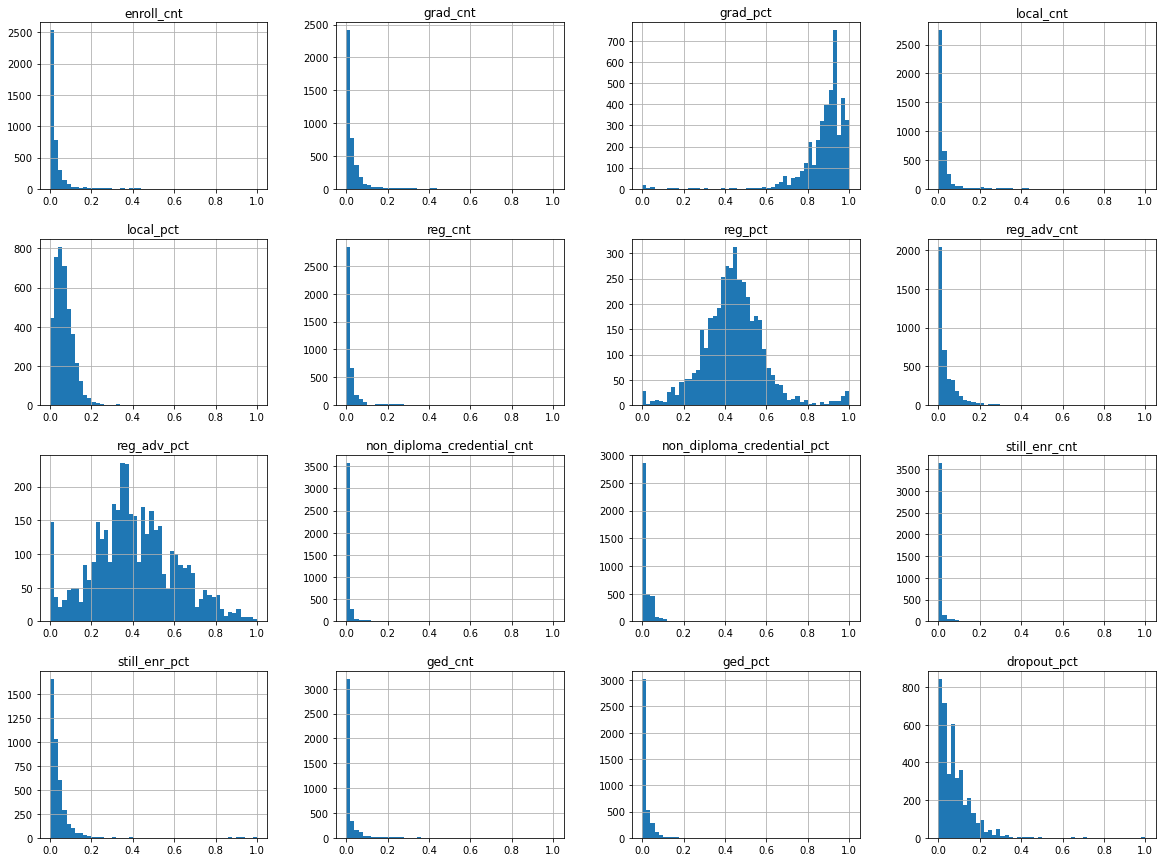

In [47]:
data_stand_update.columns = data_ex.columns
data_stand_update.hist(bins=50, figsize=(20,15))
plt.show()

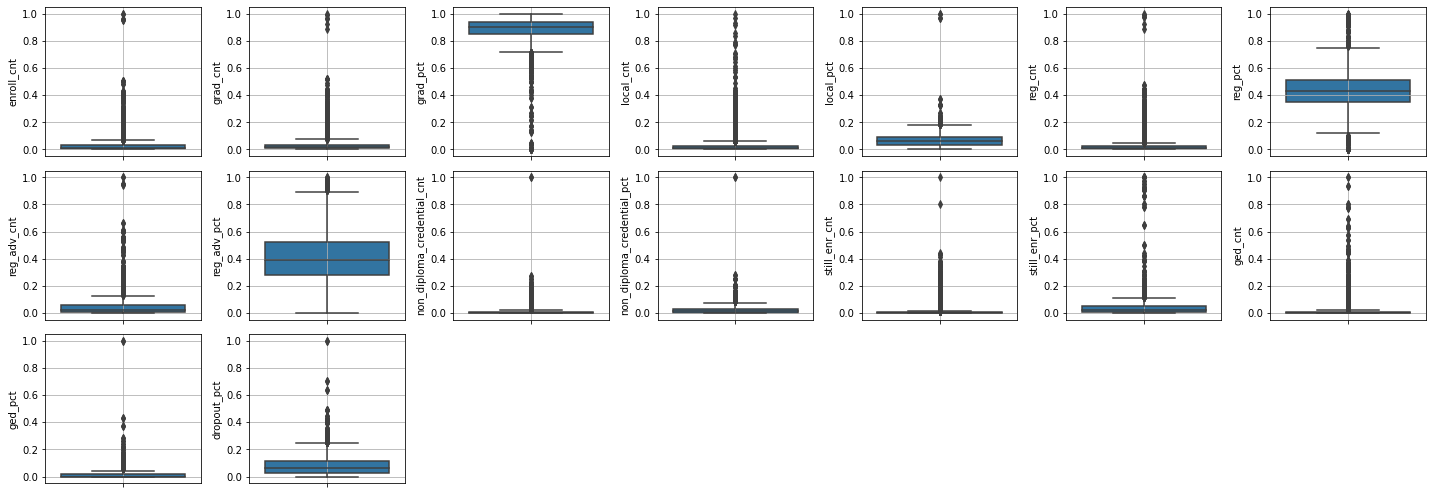

In [48]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(data_ex):
    plt.subplot(7,7, i + 1)
    sns.boxplot(data=data_stand_update,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

Based on the standardscaler and feature selection, the re-run EDA has been improved from the initial EDA slightly. Although there are still some outliers and skewed distributions, we minimize the influence of our models.   

## 5. Regression Modeling

In this section, we will use six models in two different group of attribues.
- The first forluma includes: 'enroll_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','dropout_pct'. 
- The second forluma includes: 'reg_cnt','enroll_cnt','ged_cnt','still_enr_pct','non_diploma_credential_cnt'.

#### Poisson regression models

Model 1: Use the features from Step forward method

In [49]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

formula1_train1 = "y_train ~ X1_train.iloc[:,0] + X1_train.iloc[:,1] + X1_train.iloc[:,2] + X1_train.iloc[:,3] + X1_train.iloc[:,4]"
#formula1_test1 = "y_test ~ X1_test['enroll_cnt']+ X1_test['non_diploma_credential_pct'] + X1_test['still_enr_pct'] + X1_test['ged_pct'] + X1_test['dropout_pct']"


In [51]:
X1_train

,enroll_cnt,reg_adv_pct,still_enr_pct,ged_pct,dropout_pct
3258,0.049504,0.397849,0.07,0.000000,0.038462
3382,0.007088,0.397849,0.10,0.000000,0.089744
2704,0.042307,0.602151,0.04,0.021739,0.025641
2724,0.009923,0.580645,0.01,0.043478,0.000000
1855,0.100752,0.161290,0.06,0.065217,0.192308
...,...,...,...,...,...
835,0.014829,0.462366,0.01,0.000000,0.051282
3264,0.025624,0.634409,0.05,0.000000,0.038462
1653,0.008069,0.602151,0.01,0.000000,0.102564
2607,0.006324,0.290323,0.00,0.000000,0.243590


In [52]:
y_train, X_train = dmatrices(formula1_train1, X1_train, return_type='dataframe')
#y_test, X_test = dmatrices(formula1_test1, X1_test, return_type='dataframe')

In [53]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                y_train   No. Observations:                 2832
Model:                            GLM   Df Residuals:                     2826
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37706.
Date:                Sun, 24 Oct 2021   Deviance:                       65489.
Time:                        23:39:09   Pearson chi2:                 6.45e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.3199    

Above is the summary of our first Poisson regression model. 

Model 2: Univariate Selection Method

In [54]:
formula1_train2 = "y_train ~ X2_train.iloc[:,0] + X2_train.iloc[:,1] + X2_train.iloc[:,2] + X2_train.iloc[:,3] + X2_train.iloc[:,4]"

In [55]:
# X2_train = X2_train.reset_index(drop = True)
# X2_train

In [56]:
y_train, X_train = dmatrices(formula1_train2,X2_train, return_type='dataframe')
#y_test, X_test = dmatrices(formula1_test2, X2_test, return_type='dataframe')

In [57]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                y_train   No. Observations:                 2832
Model:                            GLM   Df Residuals:                     2826
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55861.
Date:                Sun, 24 Oct 2021   Deviance:                   1.0180e+05
Time:                        23:39:09   Pearson chi2:                 1.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7325    

#### Negative binomial regression models

In [58]:
import statsmodels.formula.api as smf
from patsy import dmatrices
import statsmodels.api as sm


Model 1: Use the features from Step forward method

In [59]:
# The following output shows the first few and last few values of fitted λ vector:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[17.7641161  15.66351963 18.23577231 ... 15.64035524 16.26085175
 15.42044456]
2832


In [60]:
import statsmodels.formula.api as smf

In [61]:
X1_train['BB_LAMBDA'] = poisson_training_results.mu

In [62]:
y_train = y_train.reset_index(drop = True)

In [63]:
y_train = y_train.astype(float)

In [64]:
column = np.array(X1_train.columns.tolist())

In [65]:
column

array([['enroll_cnt'],
       ['reg_adv_pct'],
       ['still_enr_pct'],
       ['ged_pct'],
       ['dropout_pct'],
       ['BB_LAMBDA']], dtype='<U13')

In [66]:
features_list = []
for i in column:
    features_list.append(i[0])
features_list 

['enroll_cnt',
 'reg_adv_pct',
 'still_enr_pct',
 'ged_pct',
 'dropout_pct',
 'BB_LAMBDA']

In [67]:
X1_train.columns

MultiIndex([(   'enroll_cnt',),
            (  'reg_adv_pct',),
            ('still_enr_pct',),
            (      'ged_pct',),
            (  'dropout_pct',),
            (    'BB_LAMBDA',)],
           )

In [68]:
X1_train.columns = features_list

In [69]:
X1_train = X1_train.reset_index(drop = True)

In [70]:
X1_train

,enroll_cnt,reg_adv_pct,still_enr_pct,ged_pct,dropout_pct,BB_LAMBDA
0,0.049504,0.397849,0.07,0.000000,0.038462,17.764116
1,0.007088,0.397849,0.10,0.000000,0.089744,15.663520
2,0.042307,0.602151,0.04,0.021739,0.025641,18.235772
3,0.009923,0.580645,0.01,0.043478,0.000000,17.456181
4,0.100752,0.161290,0.06,0.065217,0.192308,50.712944
...,...,...,...,...,...,...
2827,0.014829,0.462366,0.01,0.000000,0.051282,16.221833
2828,0.025624,0.634409,0.05,0.000000,0.038462,16.307935
2829,0.008069,0.602151,0.01,0.000000,0.102564,15.640355
2830,0.006324,0.290323,0.00,0.000000,0.243590,16.260852


In [71]:
y_train.y_train

0        16.0
1         5.0
2         7.0
3         0.0
4       141.0
        ...  
2827      5.0
2828      6.0
2829      6.0
2830     12.0
2831      0.0
Name: y_train, Length: 2832, dtype: float64

In [72]:
X1_train.BB_LAMBDA

0       17.764116
1       15.663520
2       18.235772
3       17.456181
4       50.712944
          ...    
2827    16.221833
2828    16.307935
2829    15.640355
2830    16.260852
2831    15.420445
Name: BB_LAMBDA, Length: 2832, dtype: float64

In [73]:
type(X1_train.BB_LAMBDA)

pandas.core.series.Series

In [74]:
#type(X1_train.BB_LAMBDA)--pandas.core.series.Series
#type(y_train.y_train)--pandas.core.series.Series

In [75]:
X1_train['AUX_OLS_DEP'] = ((y_train.y_train - X1_train.BB_LAMBDA)**2 - X1_train.BB_LAMBDA)/X1_train.BB_LAMBDA
X1_train['AUX_OLS_DEP']

0        -0.824809
1         6.259585
2         5.922799
3        16.456181
4       159.743035
           ...    
2827      6.762966
2828      5.515450
2829      4.942093
2830      0.116476
2831     14.420445
Name: AUX_OLS_DEP, Length: 2832, dtype: float64

In [76]:
X1_train.head(1)

,enroll_cnt,reg_adv_pct,still_enr_pct,ged_pct,dropout_pct,BB_LAMBDA,AUX_OLS_DEP
0,0.049504,0.397849,0.07,0.0,0.038462,17.764116,-0.824809


In [77]:
ols_expr = "X1_train[['AUX_OLS_DEP']] ~ X1_train[['BB_LAMBDA']] - 1"

In [78]:
# Configure and fit the OLSR model:

aux_olsr_results = smf.ols(ols_expr, X1_train).fit()


In [79]:
# Print the regression params:
print(aux_olsr_results.params)

X1_train[['BB_LAMBDA']]    0.596417
dtype: float64


In [80]:
#poisson_training_results = sm.GLM(y_train, X1_train, family=sm.families.Poisson()).fit()
#print(poisson_training_results.summary())

In [81]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, X1_train).fit()

In [82]:
aux_olsr_results.params[0]

0.5964168787285684

In [83]:
nb1_training_results = sm.GLM(y_train, X1_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit(method="lbfgs")

C:\Users\zhous\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
print(nb1_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                y_train   No. Observations:                 2832
Model:                            GLM   Df Residuals:                     2825
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                -8644.2
Date:                Sun, 24 Oct 2021   Deviance:                       2561.0
Time:                        23:39:10   Pearson chi2:                 1.92e+03
No. Iterations:                     0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
enroll_cnt       18.0201      0.469     38.452

Model 2: Univariate Selection Method

In [85]:
# The following output shows the first few and last few values of fitted λ vector:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[17.7641161  15.66351963 18.23577231 ... 15.64035524 16.26085175
 15.42044456]
2832


In [86]:
X2_train = X2_train.copy().reset_index()

In [87]:
X2_train['BB_LAMBDA'] = poisson_training_results.mu

In [88]:
X2_train_BB_LAMBDA = X2_train[['BB_LAMBDA']].squeeze()
X2_train_BB_LAMBDA

0       17.764116
1       15.663520
2       18.235772
3       17.456181
4       50.712944
          ...    
2827    16.221833
2828    16.307935
2829    15.640355
2830    16.260852
2831    15.420445
Name: (BB_LAMBDA,), Length: 2832, dtype: float64

In [89]:
y_train.y_train

0        16.0
1         5.0
2         7.0
3         0.0
4       141.0
        ...  
2827      5.0
2828      6.0
2829      6.0
2830     12.0
2831      0.0
Name: y_train, Length: 2832, dtype: float64

In [90]:

X2_train['AUX_OLS_DEP'] = ((y_train.y_train - X2_train_BB_LAMBDA)**2 - X2_train_BB_LAMBDA)/X2_train_BB_LAMBDA
X2_train[['AUX_OLS_DEP']]


,AUX_OLS_DEP
0,-0.824809
1,6.259585
2,5.922799
3,16.456181
4,159.743035
...,...
2827,6.762966
2828,5.515450
2829,4.942093
2830,0.116476


In [91]:
ols_expr = "X2_train[['AUX_OLS_DEP']] ~ X2_train[['BB_LAMBDA']] - 1"

In [92]:
# Configure and fit the OLSR model:

aux_olsr_results = smf.ols(ols_expr, X2_train).fit()

In [93]:
# Print the regression params:
print(aux_olsr_results.params)

X2_train[['BB_LAMBDA']]    0.596417
dtype: float64


In [94]:
nb2_training_results = sm.GLM(y_train, X2_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [95]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                y_train   No. Observations:                 2832
Model:                            GLM   Df Residuals:                     2824
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10865.
Date:                Sun, 24 Oct 2021   Deviance:                       7002.3
Time:                        23:39:10   Pearson chi2:                 1.55e+04
No. Iterations:                    99                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
index               

#### Multiple linear regression models

Model 1: Use the features from Step forward method

In [96]:
X1_train

,enroll_cnt,reg_adv_pct,still_enr_pct,ged_pct,dropout_pct,BB_LAMBDA,AUX_OLS_DEP
0,0.049504,0.397849,0.07,0.000000,0.038462,17.764116,-0.824809
1,0.007088,0.397849,0.10,0.000000,0.089744,15.663520,6.259585
2,0.042307,0.602151,0.04,0.021739,0.025641,18.235772,5.922799
3,0.009923,0.580645,0.01,0.043478,0.000000,17.456181,16.456181
4,0.100752,0.161290,0.06,0.065217,0.192308,50.712944,159.743035
...,...,...,...,...,...,...,...
2827,0.014829,0.462366,0.01,0.000000,0.051282,16.221833,6.762966
2828,0.025624,0.634409,0.05,0.000000,0.038462,16.307935,5.515450
2829,0.008069,0.602151,0.01,0.000000,0.102564,15.640355,4.942093
2830,0.006324,0.290323,0.00,0.000000,0.243590,16.260852,0.116476


In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#create a model with the variables chosen for model1
multipleregression1=X1_train
multipleregression1=sm.add_constant(multipleregression1)
model1 = sm.OLS(y_train['y_train'], multipleregression1)
multipleregression1_fit = model1.fit()

#print the results
print(multipleregression1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3948.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:39:10   Log-Likelihood:                -12786.
No. Observations:                2832   AIC:                         2.559e+04
Df Residuals:                    2824   BIC:                         2.564e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.1696      1.466     -2.844

Model 2: Univariate Selection Method

In [98]:
X2_train

,index,reg_cnt,enroll_cnt,ged_cnt,still_enr_cnt,non_diploma_credential_cnt,BB_LAMBDA,AUX_OLS_DEP
0,3258,0.042508,0.049504,0.000000,0.023896,0.007168,17.764116,-0.824809
1,3382,0.006103,0.007088,0.000000,0.005069,0.000000,15.663520,6.259585
2,2704,0.026515,0.042307,0.020619,0.012310,0.007168,18.235772,5.922799
3,2724,0.007365,0.009923,0.020619,0.000724,0.017921,17.456181,16.456181
4,1855,0.099747,0.100752,0.278351,0.041999,0.078853,50.712944,159.743035
...,...,...,...,...,...,...,...,...
2827,835,0.013047,0.014829,0.000000,0.000724,0.007168,16.221833,6.762966
2828,3264,0.015993,0.025624,0.000000,0.007965,0.000000,16.307935,5.515450
2829,1653,0.004840,0.008069,0.000000,0.000724,0.000000,15.640355,4.942093
2830,2607,0.006103,0.006324,0.000000,0.000000,0.014337,16.260852,0.116476


In [99]:
#create a model with the variables chosen for model1
y_train = y_train.reset_index(drop = True)
multipleregression2=X2_train
multipleregression2 = multipleregression2.reset_index(drop = True)
model2 = sm.OLS(y_train['y_train'], multipleregression2)
multipleregression2_fit = model2.fit()
#print the results
print(multipleregression2_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                y_train   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              5080.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:39:10   Log-Likelihood:                         -12439.
No. Observations:                2832   AIC:                                  2.489e+04
Df Residuals:                    2824   BIC:                                  2.494e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## 6. Select Models

Compareing the Log-Likelihood:

Poisson regression models:
- model1: Log-Likelihood:                -37706
- model2: Log-Likelihood:                -55861

Negative binomial regression models
- model1: Log-Likelihood:                -8644.2
- model2: Log-Likelihood:                -10865.

Multiple regression models
- Log-Likelihood:                         -12786
- Log-Likelihood:                         -12439

According to the log likelihood results, we prefer the negative binomial regression model 1. Because it has the hightest Log-Likelihood. The higher Log-Likelihood, the more accurate prediction. 

## 7. Conclusions

According to the log likelihood results, we prefer the negative binomial regression model 1, which has 'enroll_cnt','non_diploma_credential_pct',
'non_diploma_credential_pct','still_enr_cnt','still_enr_pct','dropout_pct'. Compare to these three types of models, we know in different scenarios, how to choose the best model by comparing their log likelihood results. 

In the future study, we would love to try more methods to test the model and prediction accuracy. 


## 8. Reference

- https://timeseriesreasoning.com/contents/negative-binomial-regression-model/
- https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
- https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://www.xknote.com/ask/60c9b3246c1ff.html